# Extracting text from PDF: evaluation of different libraries

## Define path to PDF file and parameters 

In [1]:
# Define path

from pathlib import Path
START_DIR = Path(".")  # Project folder

In [2]:
# Define book-specific parameters

book_name = "Wells_The-time-machine"

first_page = 4
last_page = 62


# Define the page marging for cropping
margin_left = 50        # x_0
margin_upper = 60       # y_0
margin_right = 560      # x_1          
margin_lower = 730      # y_1
margins = (margin_left, margin_upper, margin_right, margin_lower)

## Method 1: using *pdfplumber* 
### (open-source library, but slow and not very precise)

In [3]:
import pdfplumber

In [4]:
# Open PDF file
pdf = pdfplumber.open(Path( START_DIR / "Input" / f"{book_name}.pdf"))

In [5]:
# Get metadata
pdf.metadata

{'Author': 'H. G. Wells',
 'CreationDate': "D:20201219043221+00'00'",
 'Creator': 'calibre 3.40.1 [https://calibre-ebook.com]',
 'Producer': 'calibre 3.40.1 [https://calibre-ebook.com]',
 'Title': 'The Time Machine'}

In [6]:
# Working with one sample page
page = pdf.pages[58]

In [7]:
# Get page data
print(f'Page number: {page.page_number}, Page width: {page.width}, Page height: {page.height}')

Page number: 59, Page width: 612, Page height: 792


In [8]:
# Additional page objects
print(f'In total this page contains {len(page.objects)} object(s), there are {len(page.images)} images, {len(page.curves)} curves and {len(page.lines)} lines.')

In total this page contains 1 object(s), there are 0 images, 0 curves and 0 lines.


In [9]:
# Extracting the pext from sample page
print(page.extract_text(x_tolerance=0.5))

After the Story
“I know,” he said, after a pause, “that all this will be absolutely incredible to you,
but to me the one incredible thing is that I am here tonight in this old familiar room
looking into your friendly faces and telling you these strange adventures.” He looked at
the Medical Man. “No. I cannot expect you to believe it. Take it as a lie—or a prophecy.
Say I dreamed it in the workshop. Consider I have been speculating upon the destinies
of our race, until I have hatched this fiction. Treat my assertion of its truth as a mere
stroke of art to enhance its interest. And taking it as a story, what do you think of it?”
He took up his pipe, and began, in his old accustomed manner, to tap with it
nervously upon the bars of the grate. There was a momentary stillness. Then chairs
began to creak and shoes to scrape upon the carpet. I took my eyes off the Time
Traveller’s face, and looked round at his audience. They were in the dark, and little
spots of colour swam before them. The M

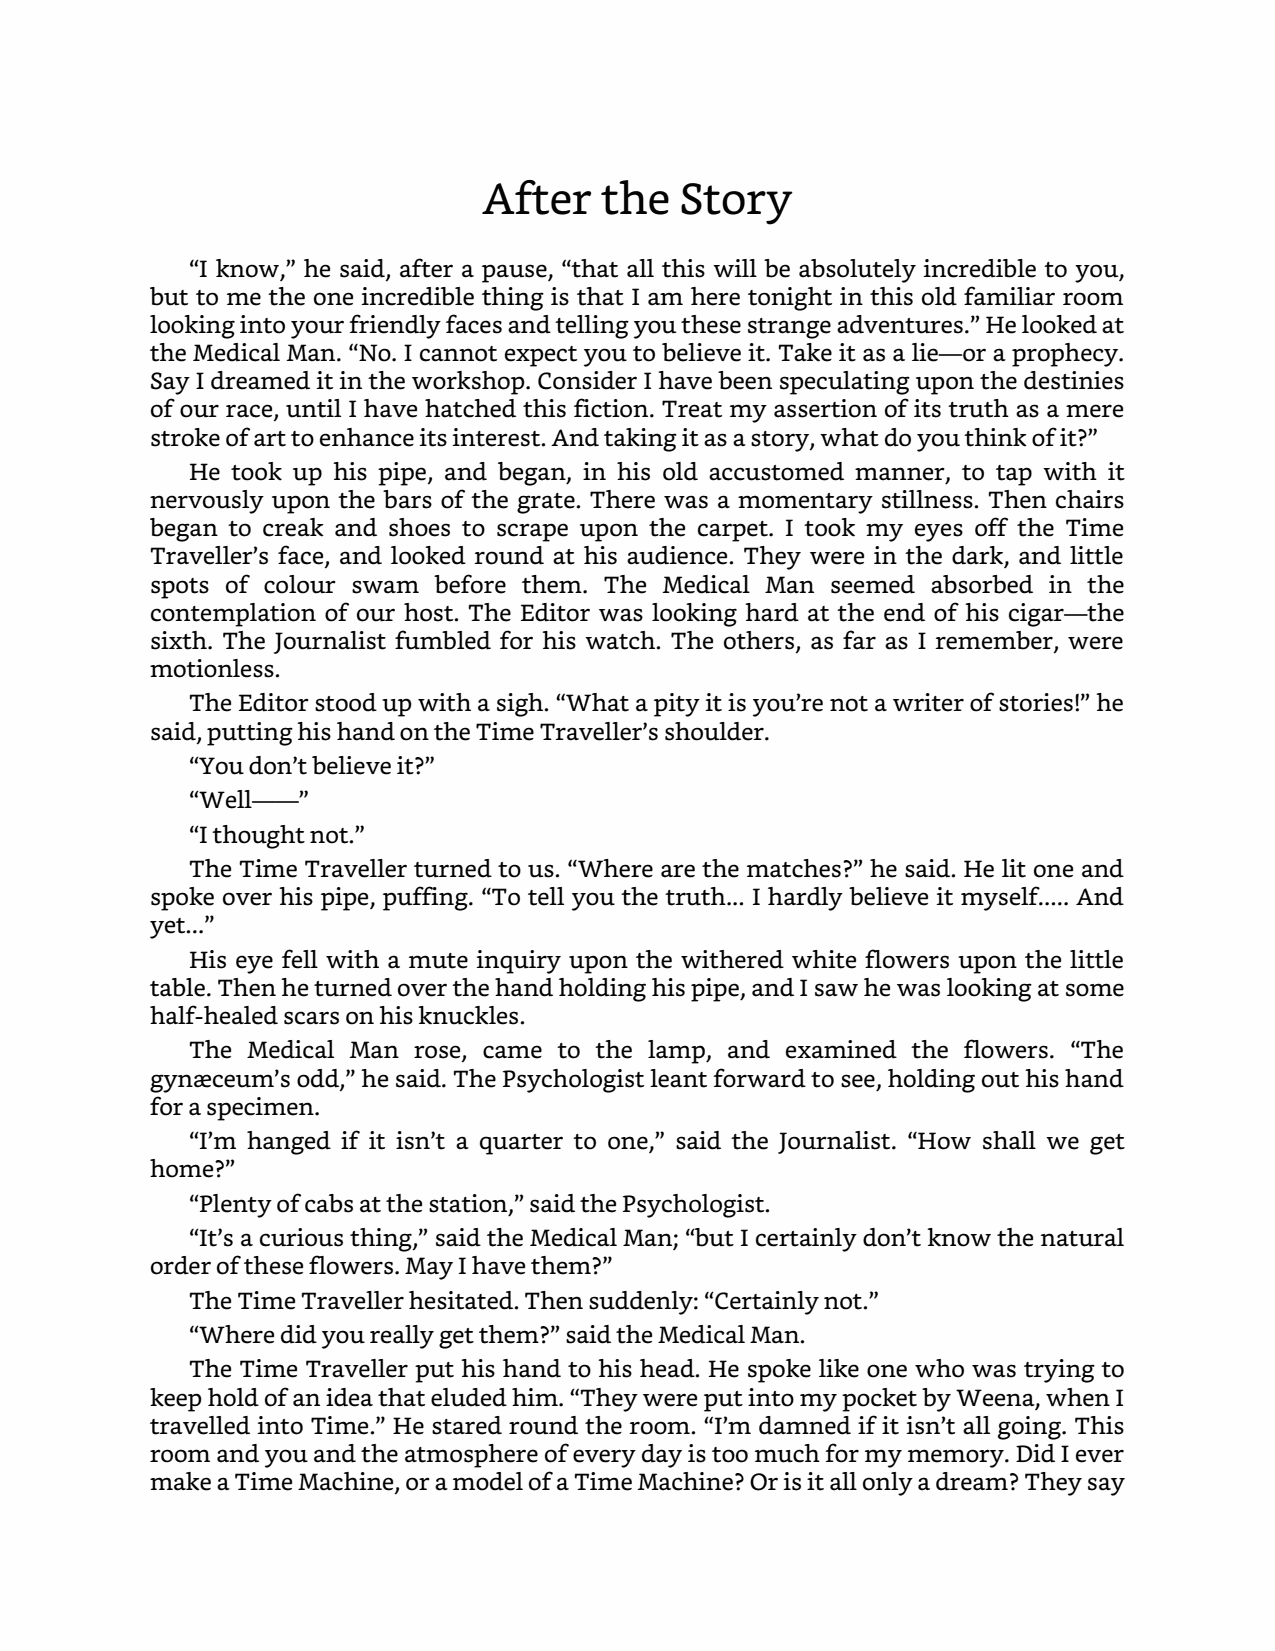

In [10]:
# Transform sample page into the PNG image (high quality)
page.to_image(resolution=150, antialias=True)

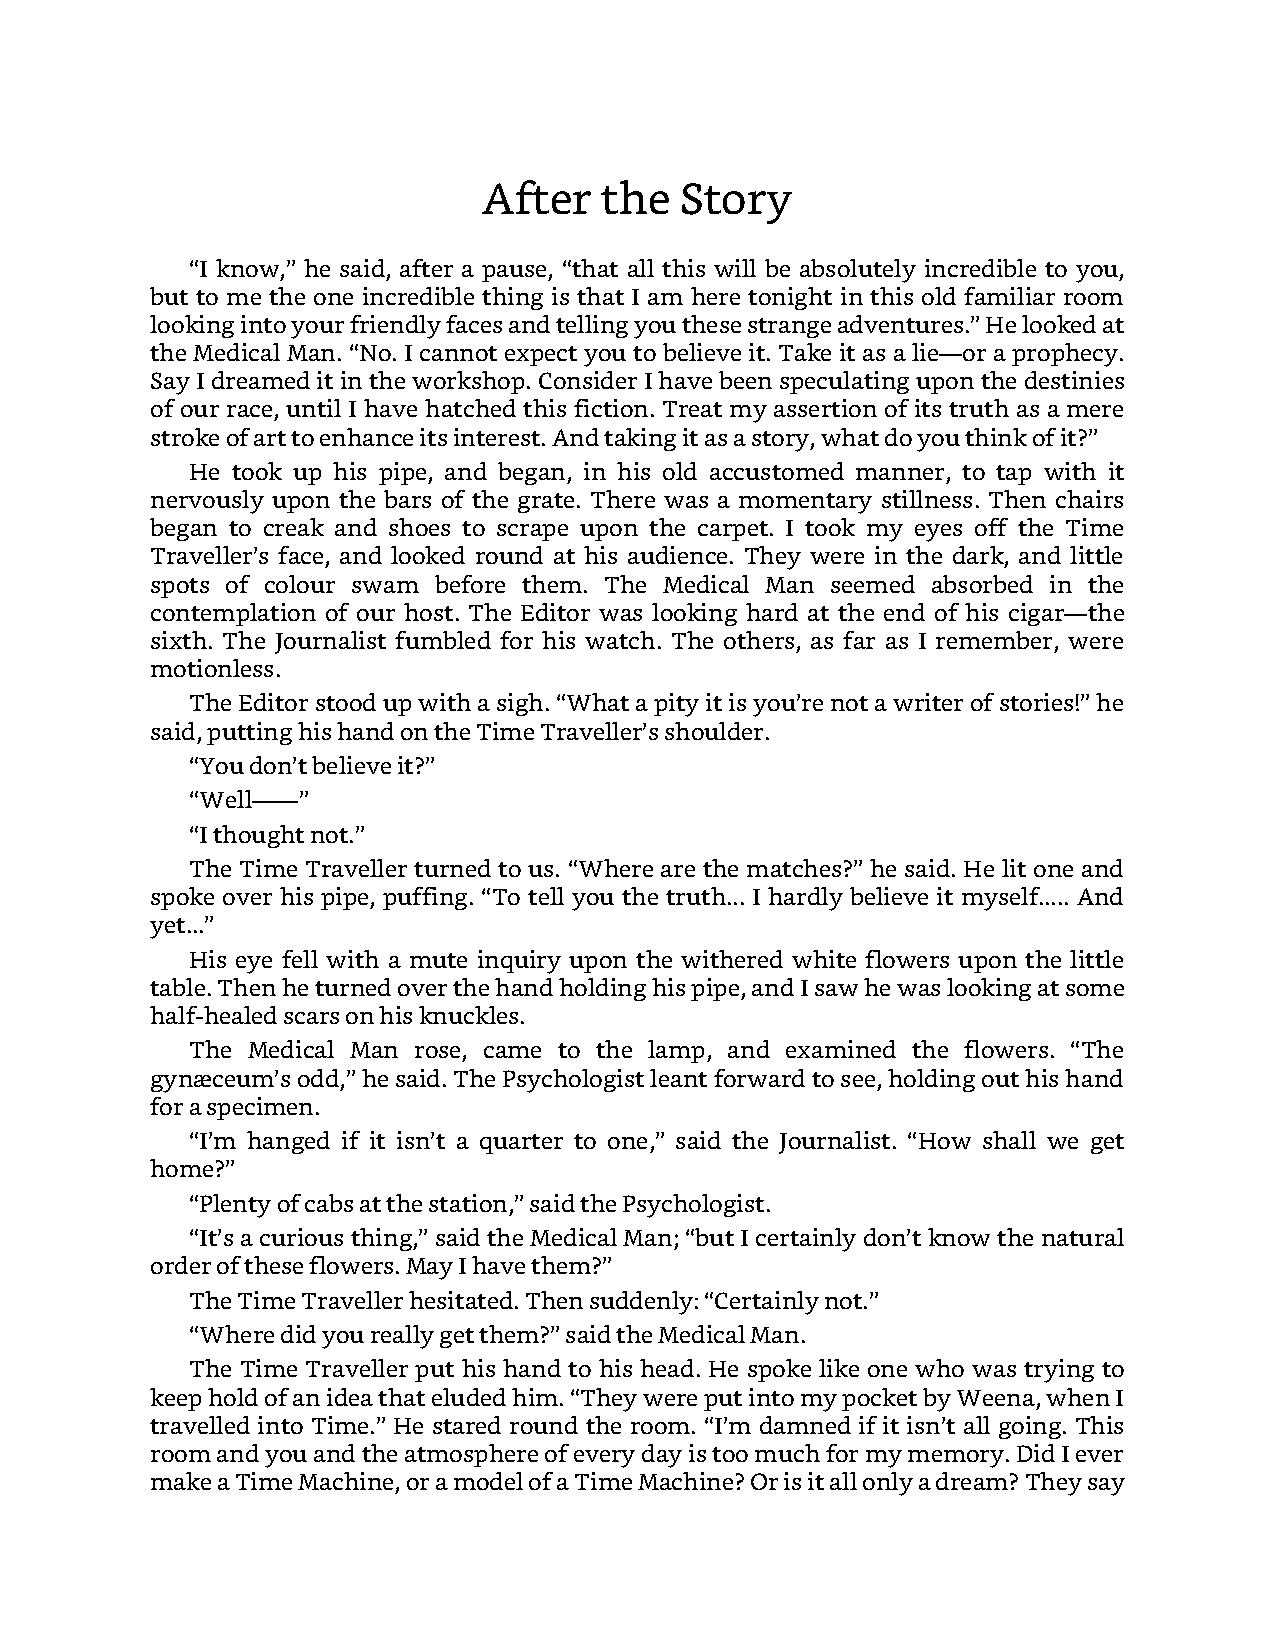

In [11]:
# Transform sample page into the PNG image (low quality, small file size)

page.to_image(resolution=150, antialias=False)

In [12]:
# Extracting words (generates a dictionary)
page.extract_words()

[{'text': 'After',
  'x0': 231.59767499999998,
  'x1': 284.16096,
  'top': 85.90800000000002,
  'doctop': 46021.908,
  'bottom': 106.90800000000002,
  'upright': True,
  'direction': 1},
 {'text': 'the',
  'x0': 288.66799125,
  'x1': 321.77206125,
  'top': 85.90800000000002,
  'doctop': 46021.908,
  'bottom': 106.90800000000002,
  'upright': True,
  'direction': 1},
 {'text': 'Story',
  'x0': 326.2734675,
  'x1': 380.407155,
  'top': 85.90800000000002,
  'doctop': 46021.908,
  'bottom': 106.90800000000002,
  'upright': True,
  'direction': 1},
 {'text': '“I',
  'x0': 90.75,
  'x1': 99.81,
  'top': 123.72749999999996,
  'doctop': 46059.7275,
  'bottom': 134.97749999999996,
  'upright': True,
  'direction': 1},
 {'text': 'know,”',
  'x0': 103.5703125,
  'x1': 142.04999625,
  'top': 123.72749999999996,
  'doctop': 46059.7275,
  'bottom': 134.97749999999996,
  'upright': True,
  'direction': 1},
 {'text': 'he',
  'x0': 145.80468374999998,
  'x1': 158.99296499999997,
  'top': 123.7274999999

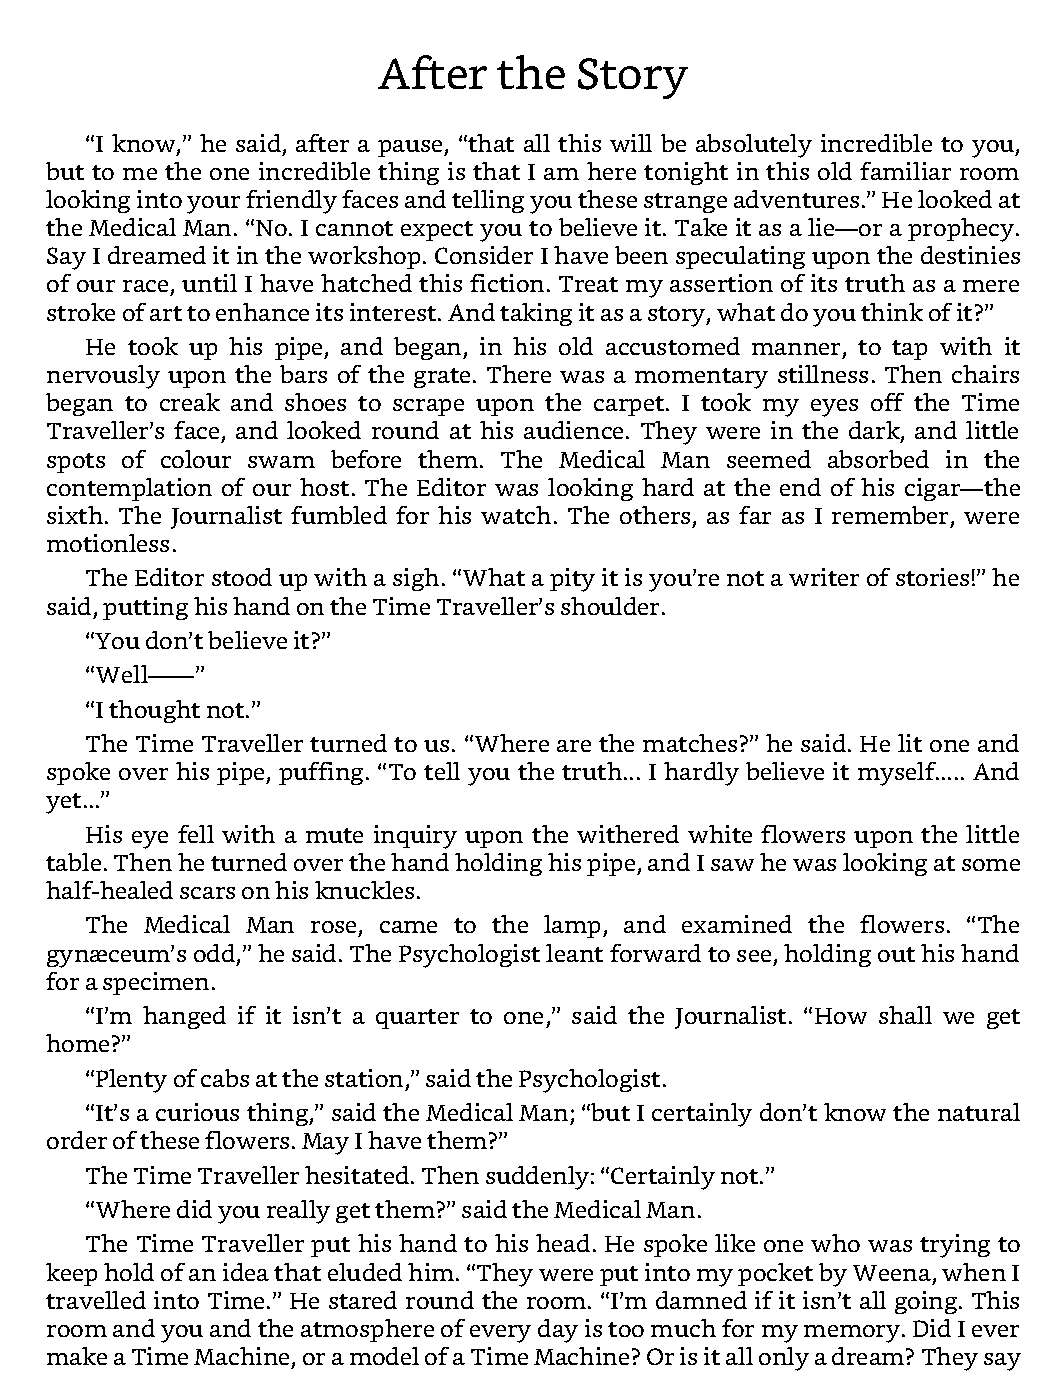

In [13]:
# Crop desired page area
page.crop(margins).to_image(resolution=150)

In [14]:
# Extracting the text from entire file, page by page
pages_dict = {}
for page in pdf.pages[(first_page - 1) : last_page]:
    cropped_page = page.crop(margins)
    pages_dict[page.page_number] = cropped_page.extract_text() + '\n'

In [17]:
# Validation - read one page
pages_dict[30]

'Explanation\n“So far as I could see, all the world displayed the same exuberant richness as the\nThames valley. From every hill I climbed I saw the same abundance of splendid\nbuildings, endlessly varied in material and style, the same clustering thickets of\nevergreens, the same blossom-laden trees and tree ferns. Here and there water shone\nlike silver, and beyond, the land rose into blue undulating hills, and so faded into the\nserenity of the sky. A peculiar feature, which presently attracted my attention, was the\npresence of certain circular wells, several, as it seemed to me, of a very great depth. One\nlay by the path up the hill which I had followed during my first walk. Like the others, it\nwas rimmed with bronze, curiously wrought, and protected by a little cupola from the\nrain. Sitting by the side of these wells, and peering down into the shafted darkness, I\ncould see no gleam of water, nor could I start any reflection with a lighted match. But\nin all of them I heard a 

In [18]:
# Text export to JSONL file (one page = one record, one record = one line)
import json
with open(Path( START_DIR / "Output" / f"{book_name}.pdfplumber.json"), "w") as output_file:
    json.dump(pages_dict, output_file, sort_keys=True, indent=4)

In [19]:
pdf.close()

## Method 2: using PyMuPDF
### (proprietary library with some use restrictions: very fast, but not very reliable)

In [20]:
# import PyMuPDF
import fitz

In [21]:
pdf_2 =  fitz.open(Path( START_DIR / "Input" / f"{book_name}.pdf"))

In [22]:
# Total number of pages
pdf_2.page_count

62

In [23]:
# Get metadata
pdf_2.metadata

{'format': 'PDF 1.4',
 'title': 'The Time Machine',
 'author': 'H. G. Wells',
 'subject': '',
 'keywords': '',
 'creator': 'calibre 3.40.1 [https://calibre-ebook.com]',
 'producer': 'calibre 3.40.1 [https://calibre-ebook.com]',
 'creationDate': "D:20201219043221+00'00'",
 'modDate': '',
 'trapped': '',
 'encryption': None}

In [24]:
# get Table of Content
pdf_2.get_toc()

[[1, 'H. G. Wells', 1],
 [1, 'Introduction', 4],
 [1, 'The Machine', 8],
 [1, 'The Time Traveller Returns', 11],
 [1, 'Time Travelling', 15],
 [1, 'In the Golden Age', 19],
 [1, 'The Sunset of Mankind', 22],
 [1, 'A Sudden Shock', 26],
 [1, 'Explanation', 30],
 [1, 'The Morlocks', 37],
 [1, 'When Night Came', 41],
 [1, 'The Palace of Green Porcelain', 45],
 [1, 'In the Darkness', 49],
 [1, 'The Trap of the White Sphinx', 53],
 [1, 'The Further Vision', 55],
 [1, 'The Time Traveller’s Return', 58],
 [1, 'After the Story', 59],
 [1, 'Epilogue', 62]]

In [25]:
# Define page range (as generator object)
pdf_2.pages(15,25)

<generator object Document.pages at 0x7fed838b8350>

In [26]:
# Load one sample page
page = pdf_2[46]

In [27]:
# Get page attributes 
print(f'Page number: {page.number}, page boundaries {page.bound()}')

Page number: 46, page boundaries Rect(0.0, 0.0, 612.0, 792.0)


In [28]:
# Convert page to Pixmap image
imx = page.get_pixmap()

# Save pixmap image as PNG 
imx.save("Output/page-%i.png" % page.number)

In [29]:
# Crop Variant 1 via *clip* attribute (no changes to original  *page* variable)

page.get_textpage(clip = fitz.Rect(margins)).extractText()

'Morlock skull I might encounter. And I longed very much to kill a Morlock or so. Very\ninhuman, you may think, to want to go killing one’s own descendants! But it was\nimpossible, somehow, to feel any humanity in the things. Only my disinclination to\nleave Weena, and a persuasion that if I began to slake my thirst for murder my Time\nMachine might suffer, restrained me from going straight down the gallery and killing\nthe brutes I heard.\n“Well, mace in one hand and Weena in the other, I went out of that gallery and into\nanother and still larger one, which at the first glance reminded me of a military chapel\nhung with tattered flags. The brown and charred rags that hung from the sides of it, I\npresently recognised as the decaying vestiges of books. They had long since dropped to\npieces, and every semblance of print had left them. But here and there were warped\nboards and cracked metallic clasps that told the tale well enough. Had I been a literary\nman I might, perhaps, have mor

In [30]:
# Crop Variant 2 via set_crop (new *page* variable replaces the old one)
page.set_cropbox(fitz.Rect(margins))
page.get_pixmap().save("Output/page_crop-%i.png" % page.number)

page.get_text('text', 
           flags=fitz.TEXT_INHIBIT_SPACES
                 )

'Morlock skull I might encounter. And I longed very much to kill a Morlock or so. Very\ninhuman, you may think, to want to go killing one’s own descendants! But it was\nimpossible, somehow, to feel any humanity in the things. Only my disinclination to\nleave Weena, and a persuasion that if I began to slake my thirst for murder my Time\nMachine might suffer, restrained me from going straight down the gallery and killing\nthe brutes I heard.\n“Well, mace in one hand and Weena in the other, I went out of that gallery and into\nanother and still larger one, which at the first glance reminded me of a military chapel\nhung with tattered flags. The brown and charred rags that hung from the sides of it, I\npresently recognised as the decaying vestiges of books. They had long since dropped to\npieces, and every semblance of print had left them. But here and there were warped\nboards and cracked metallic clasps that told the tale well enough. Had I been a literary\nman I might, perhaps, have mor

In [31]:
# Save all objects as dictionary
page.get_text('dict')

{'width': 510.0,
 'height': 670.0,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (22.0, 12.108749389648438, 489.80078125, 94.43624877929688),
   'lines': [{'spans': [{'size': 11.25,
       'flags': 4,
       'font': 'Bookerly-Regular',
       'color': 0,
       'ascender': 1.0570000410079956,
       'descender': -0.26100000739097595,
       'text': 'Morlock skull I might encounter. And I longed very much to kill a Morlock or so. Very',
       'origin': (22.0, 24.0),
       'bbox': (22.0,
        12.108749389648438,
        489.7895202636719,
        26.936250686645508)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (22.0,
      12.108749389648438,
      489.7895202636719,
      26.936250686645508)},
    {'spans': [{'size': 11.25,
       'flags': 4,
       'font': 'Bookerly-Regular',
       'color': 0,
       'ascender': 1.0570000410079956,
       'descender': -0.26100000739097595,
       'text': 'inhuman, you may think, to want to go killing one’s own descendants! But it

In [32]:
# Extracting the text from entire book, page by page (without Foreword nor Appendices)
pages_dict = {}

for page in pdf_2.pages((first_page -1 ), last_page):
    pages_dict[page.number + 1 ] = page.get_textpage(clip = fitz.Rect(margins)).extractText()

In [34]:
# Output validation
pages_dict[30]

'Explanation\n“So far as I could see, all the world displayed the same exuberant richness as the\nThames valley. From every hill I climbed I saw the same abundance of splendid\nbuildings, endlessly varied in material and style, the same clustering thickets of\nevergreens, the same blossom-laden trees and tree ferns. Here and there water shone\nlike silver, and beyond, the land rose into blue undulating hills, and so faded into the\nserenity of the sky. A peculiar feature, which presently attracted my attention, was the\npresence of certain circular wells, several, as it seemed to me, of a very great depth. One\nlay by the path up the hill which I had followed during my first walk. Like the others, it\nwas rimmed with bronze, curiously wrought, and protected by a little cupola from the\nrain. Sitting by the side of these wells, and peering down into the shafted darkness, I\ncould see no gleam of water, nor could I start any reflection with a lighted match. But\nin all of them I heard a 

In [35]:
# Text export to JSONL file (one page = one record, one record = one line)
import json
with open(Path( START_DIR / "Output" / f"{book_name}.pyMuPDF.json"), "w") as output_file:
    json.dump(pages_dict, output_file, sort_keys=True, indent=4)

In [36]:
pdf_2.close()

## Method 3: using PyPDF
### (very polular open-source library, formerly known as *pyPDF2*: 5x faster than *pdfplumber*, however 20x slower than *pyMuPdf*, and has not so many features)

In [37]:
import pypdf

In [38]:
pdf_3 =  pypdf.PdfReader(Path( START_DIR / "Input" / f"{book_name}.pdf"))

In [39]:
print(f'Total lengh of the document is {len(pdf_3.pages)} pages')

Total lengh of the document is 62 pages


In [40]:
# Get metadata
pdf_3.metadata

{'/Author': 'H. G. Wells',
 '/CreationDate': "D:20201219043221+00'00'",
 '/Creator': 'calibre 3.40.1 [https://calibre-ebook.com]',
 '/Producer': 'calibre 3.40.1 [https://calibre-ebook.com]',
 '/Title': 'The Time Machine'}

In [41]:
page = pdf_3.pages[58]

In [42]:
page.page_number

58

In [43]:
print(page.extract_text())

After the Story
“I know,” he said, after a pause, “that all this will be absolutely incredible to you,
but to me the one incredible thing is that I am here tonight in this old familiar room
looking into your friendly faces and telling you these strange adventures.” He looked at
the Medical Man. “No. I cannot expect you to believe it. Take it as a lie—or a prophecy.
Say I dreamed it in the workshop. Consider I have been speculating upon the destinies
of our race, until I have hatched this fiction. Treat my assertion of its truth as a mere
stroke of art to enhance its interest. And taking it as a story, what do you think of it?”
He took up his pipe, and began, in his old accustomed manner, to tap with it
nervously upon the bars of the grate. There was a momentary stillness. Then chairs
began to creak and shoes to scrape upon the carpet. I took my eyes off the Time
Traveller’s face, and looked round at his audience. They were in the dark, and little
spots of colour swam before them. The M

In [44]:
# Get page size

page.mediabox

RectangleObject([0, 0, 612, 792])

In [45]:
print (page.mediabox.lower_left, page.mediabox.lower_right, page.mediabox.upper_left, page.mediabox.upper_right)

(0, 0) (612, 0) (0, 792) (612, 792)


In [46]:
print(f'Page height: {page.mediabox.height}, page width: {page.mediabox.width}')

Page height: 792, page width: 612


In [47]:
# Visitor function for text cropping
def crop_page_body(text, cm, tm, font_dict, font_size):
    y = tm[5]
    if y > (page.mediabox.height - margin_lower)  and y < (page.mediabox.height - margin_upper):
        parts.append(text)
    

In [48]:
# Extracting the text from one page cropped via visitor function
parts = []
page.extract_text(visitor_text=crop_page_body)
text_body = "".join(parts)

In [49]:
# Extracting the text from entire file, page by page
pages_dict = {}
for page in pdf_3.pages[(first_page - 1) : last_page]:
    parts = []
    page.extract_text(visitor_text=crop_page_body)
    pages_dict[(page.page_number + 1)] = "".join(parts) + '\n'

In [50]:
pages_dict[46]

'interesting than this spectacle of old-time geology in decay. Exploring, I found anothershort gallery running transversely to the first. This appeared to be devoted to minerals,and the sight of a block of sulphur set my mind running on gunpowder. But I couldfind no saltpetre; indeed, no nitrates of any kind. Doubtless they had deliquesced agesago. Yet the sulphur hung in my mind, and set up a train of thinking. As for the rest ofthe contents of that gallery, though on the whole they were the best preserved of all Isaw, I had little interest. I am no specialist in mineralogy, and I went on down a veryruinous aisle running parallel to the first hall I had entered. Apparently this sectionhad been devoted to natural history, but everything had long since passed out ofrecognition. A few shrivelled and blackened vestiges of what had once been stuffedanimals, desiccated mummies in jars that had once held spirit, a brown dust ofdeparted plants: that was all! I was sorry for that, because I sh

In [51]:
# Text export to JSONL file (one page = one record, one record = one line)
import json
with open(Path( START_DIR / "Output" / f"{book_name}.pyPDF.json"), "w") as output_file:
    json.dump(pages_dict, output_file, sort_keys=True, indent=4)